In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('/content/data.xlsx')

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
301,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.shape

(302, 14)

In [9]:
df.size

4228

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [19]:
# Handling missing values
# Filling missing values with median
df.fillna(df.median(), inplace=True)

In [20]:
#Preprocessing the Dataset
# Encoding categorical variables
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

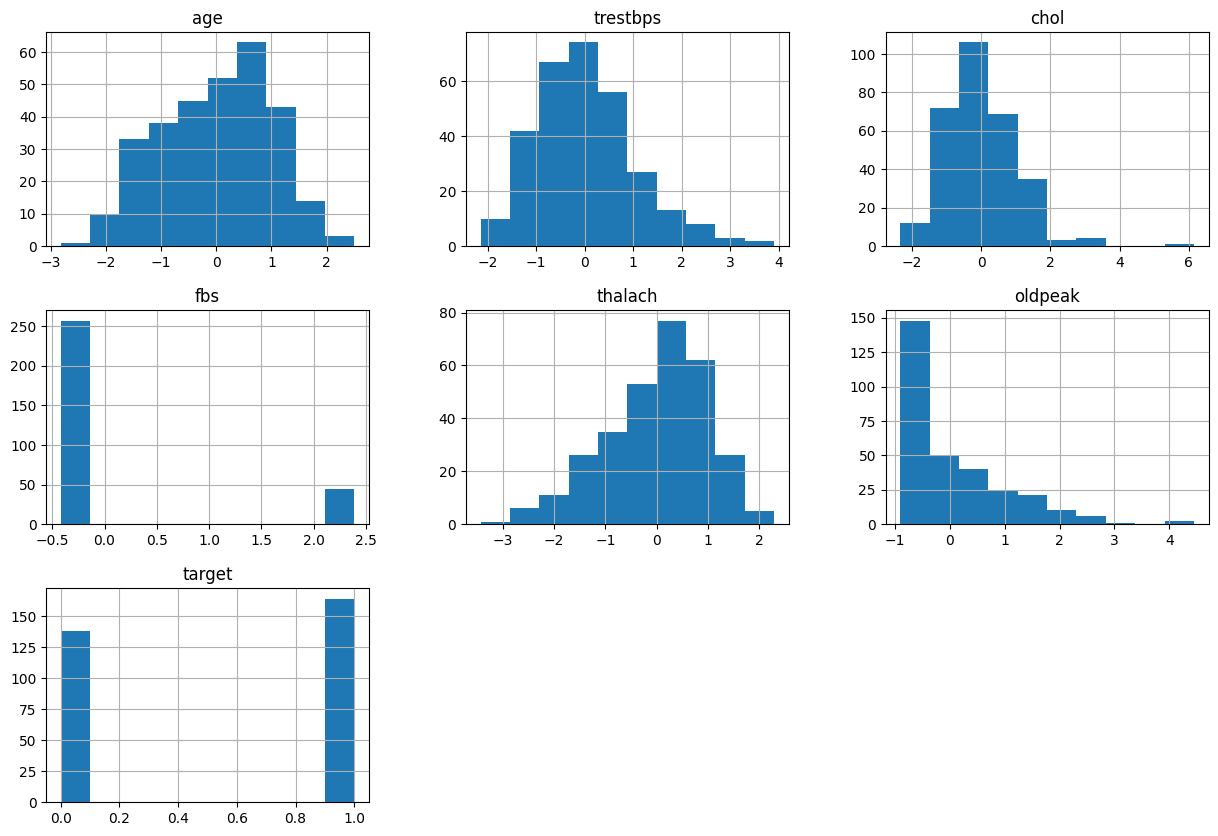

In [21]:
#Data Visualizations

# Distribution of numerical features
df.hist(figsize=(15, 10))
plt.show()

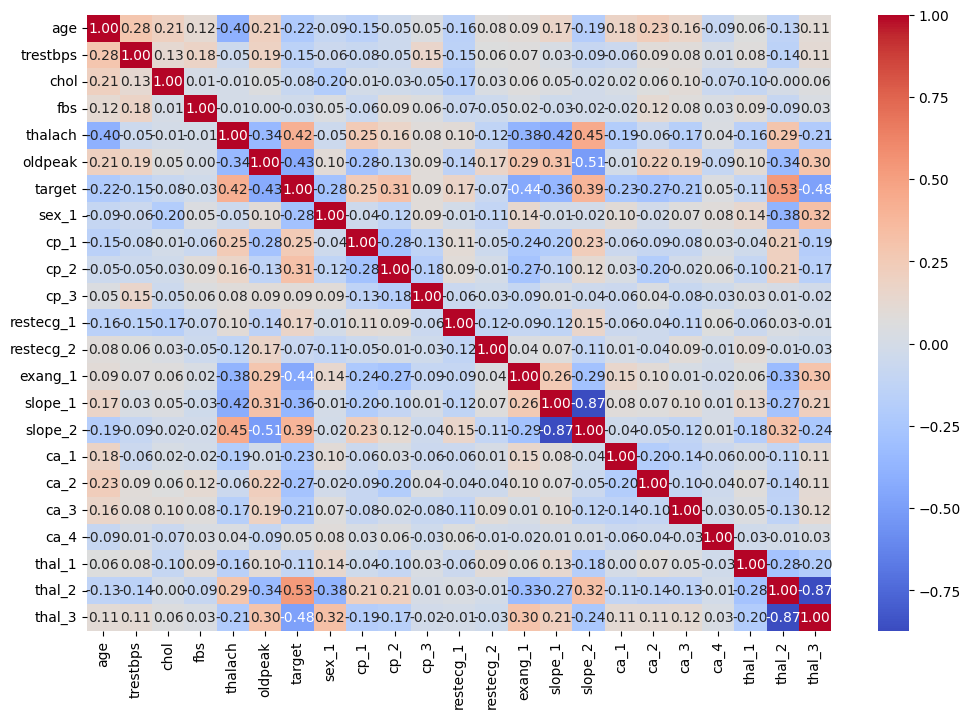

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

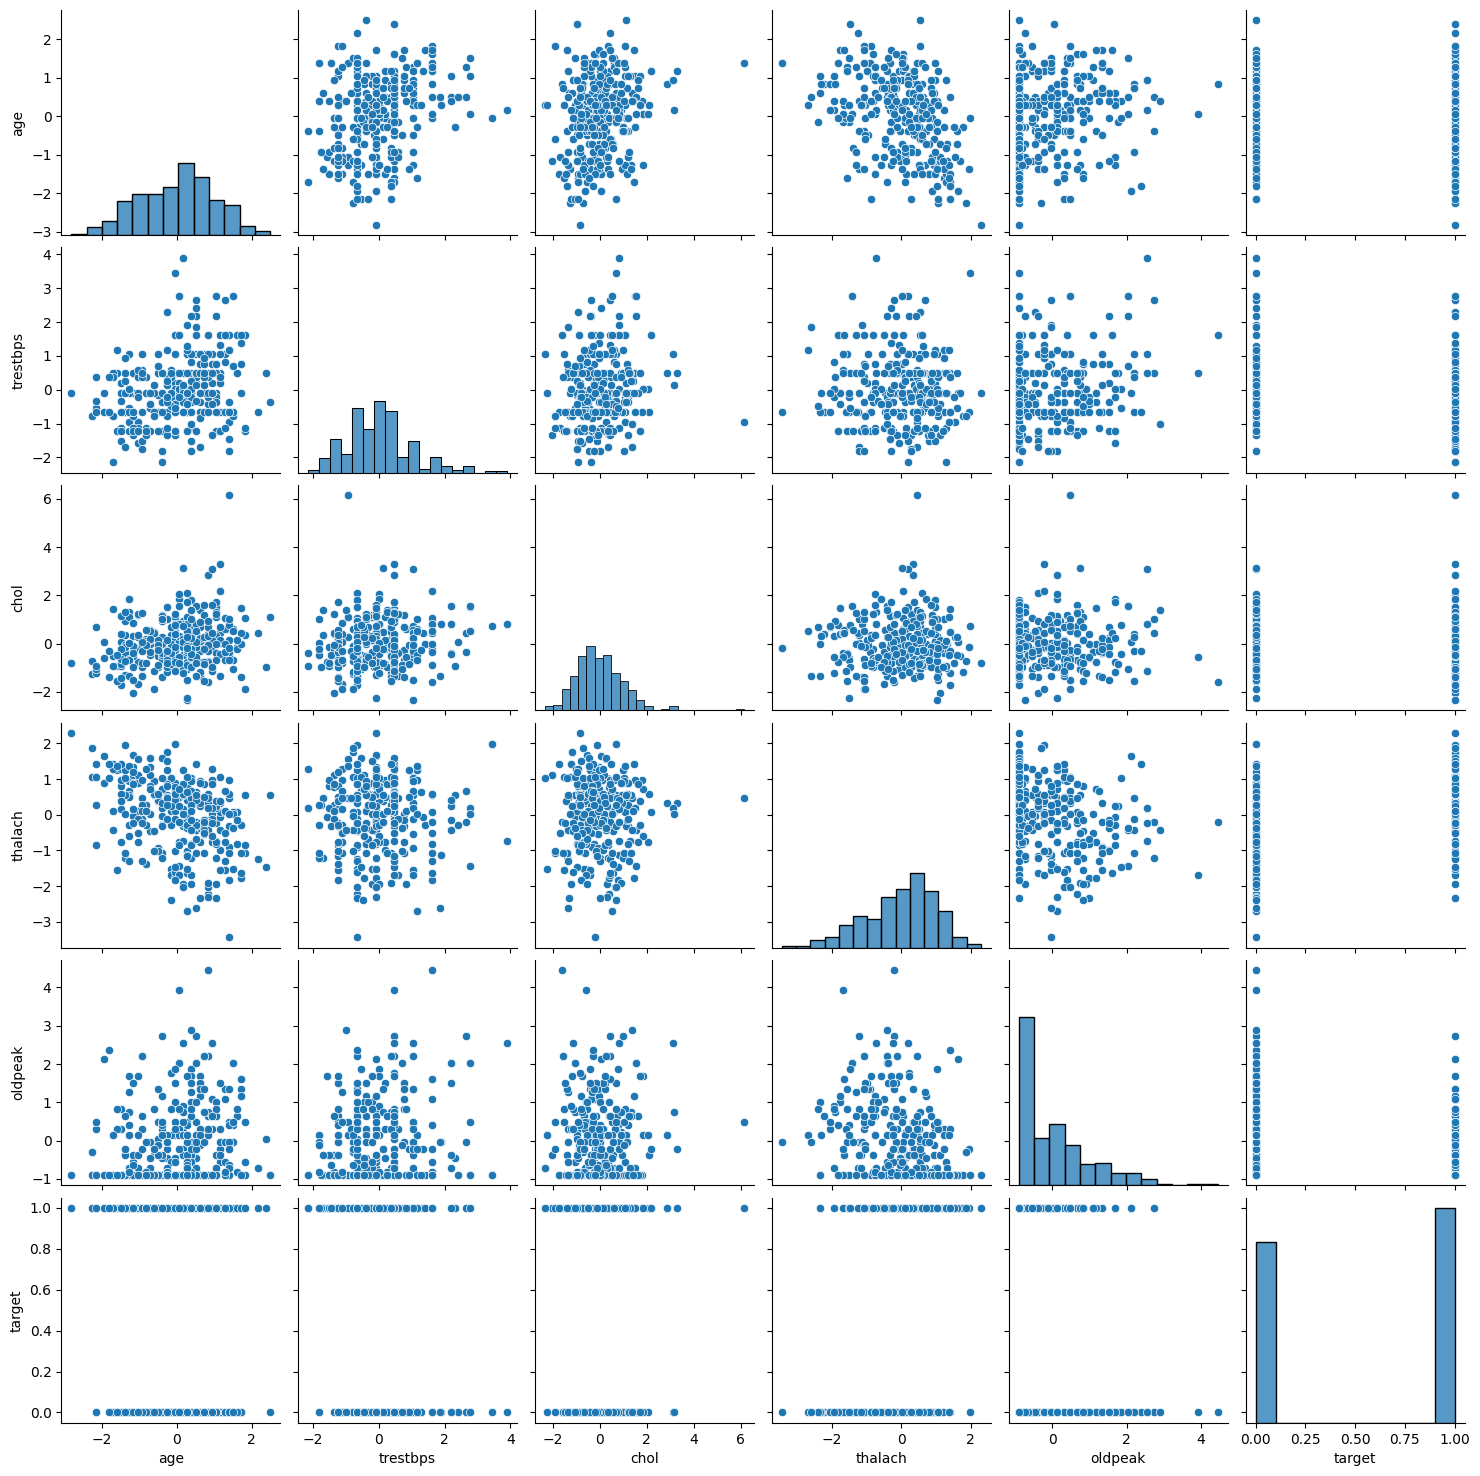

In [23]:
# Pairplot
# Pairplot of selected features
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']])
plt.show()

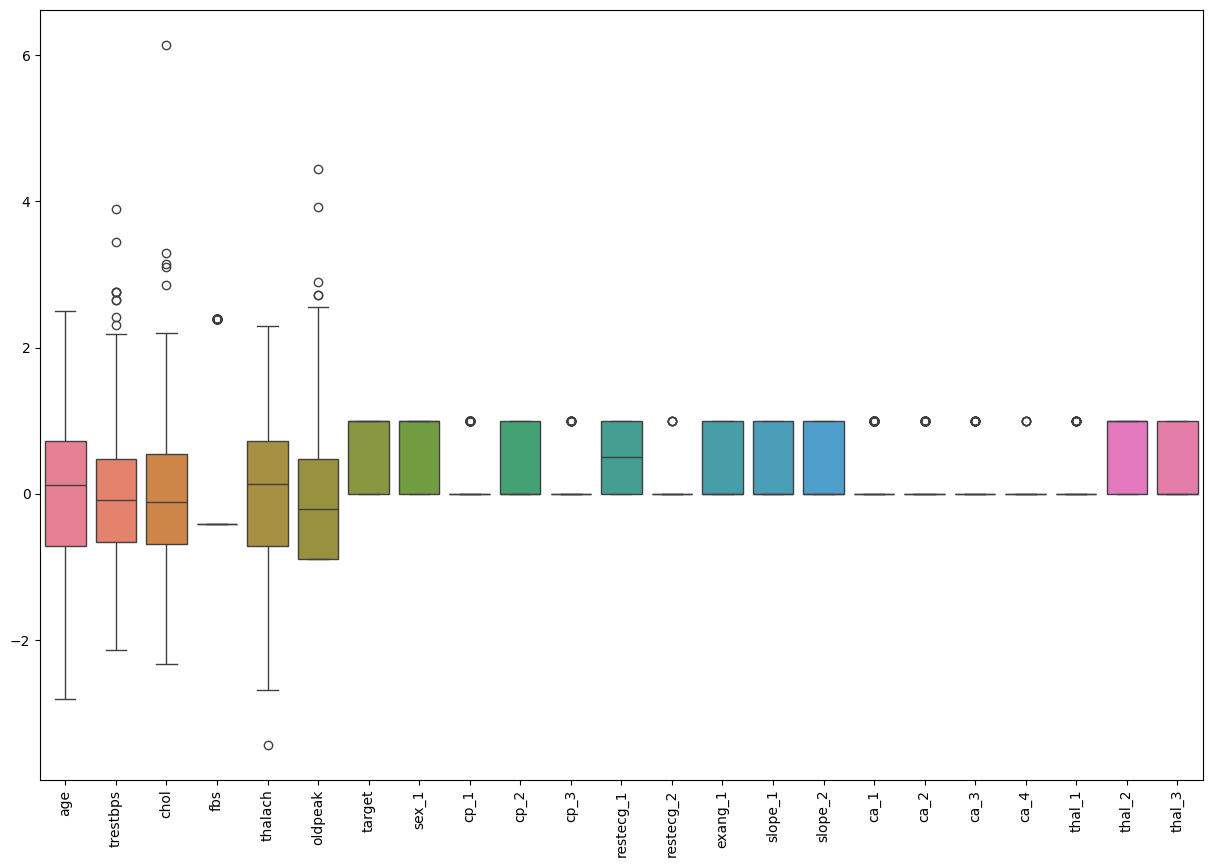

In [24]:
# Boxplot to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

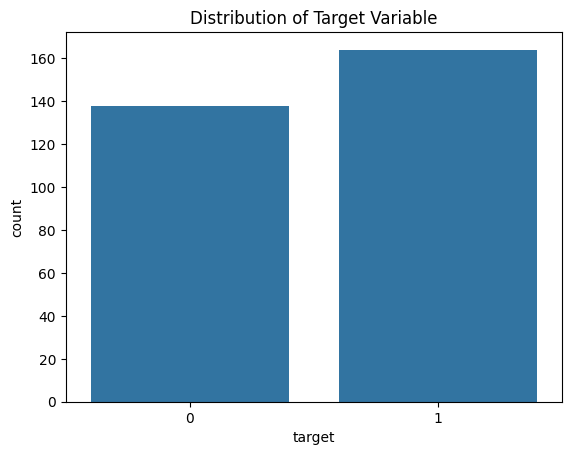

In [25]:
# Distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

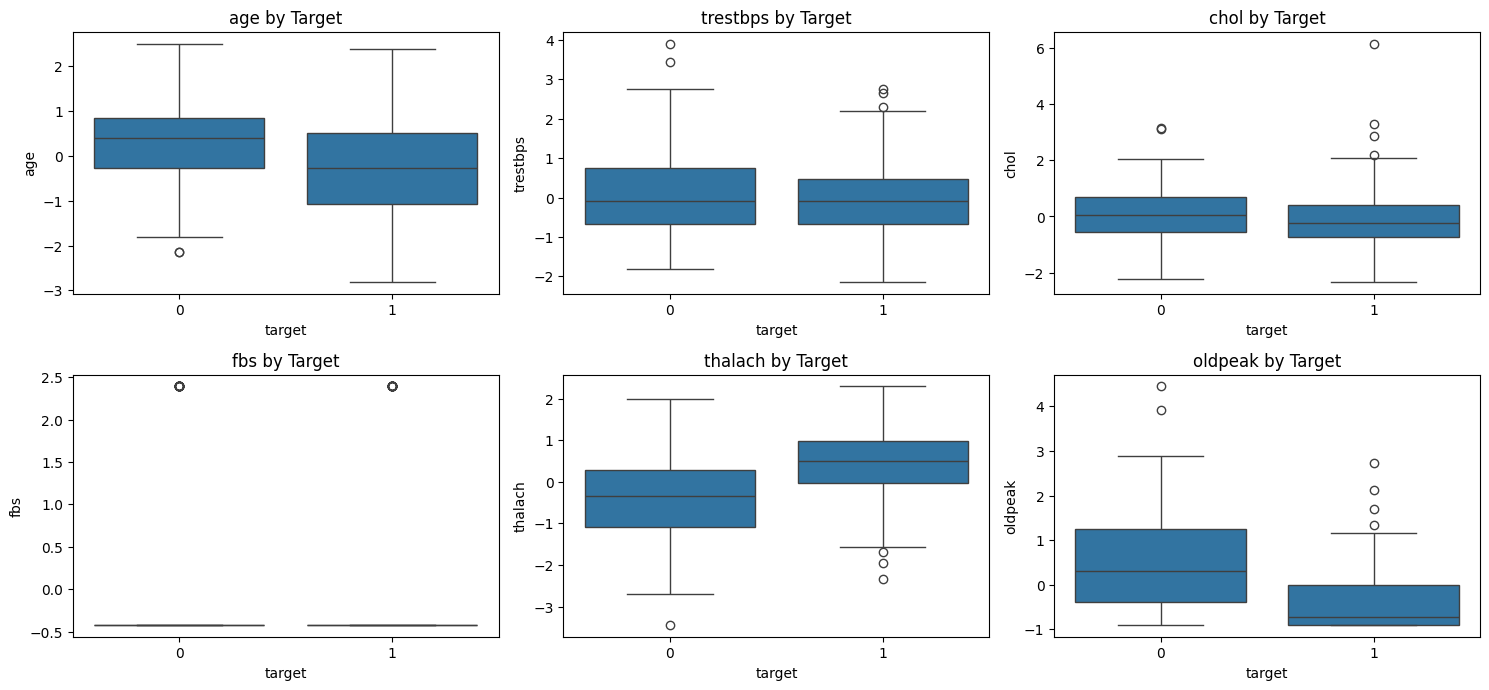

In [26]:
# Feature-Target Relationships

# Boxplot of numerical features by target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.boxplot(x='target', y=column, data=df)
    plt.title(f'{column} by Target')
plt.tight_layout()
plt.show()

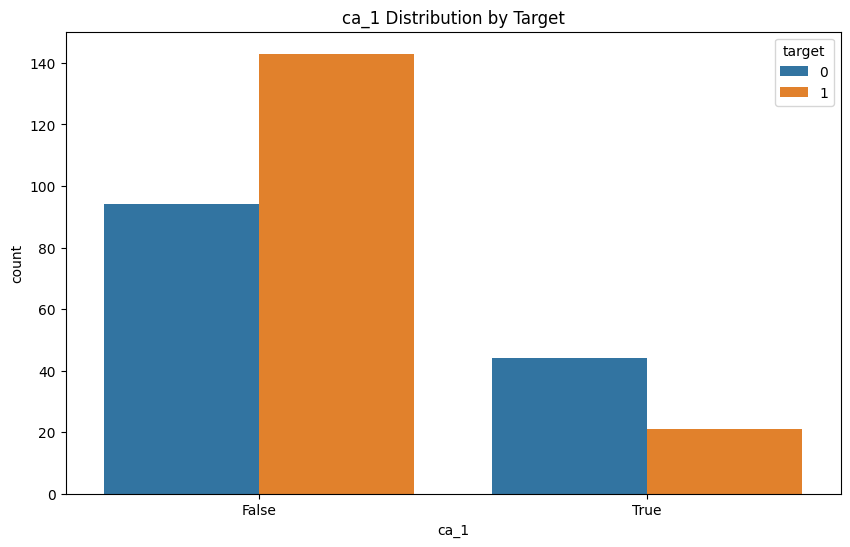

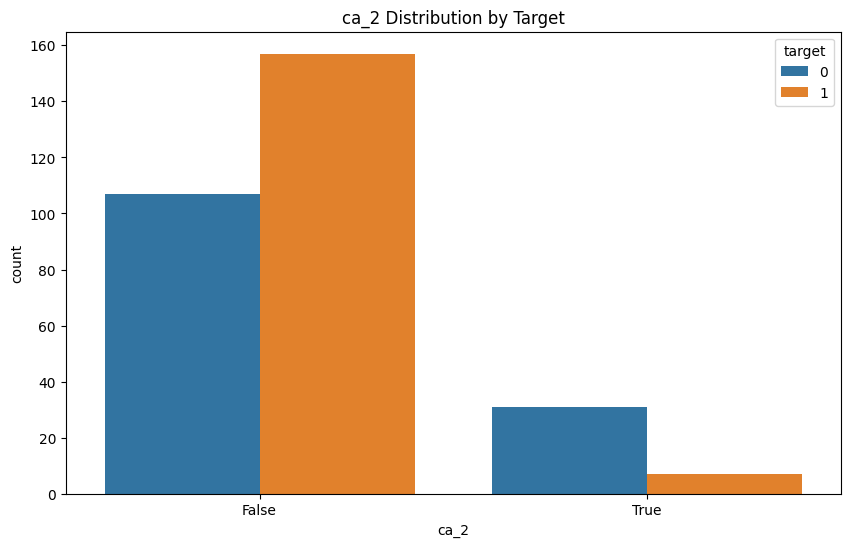

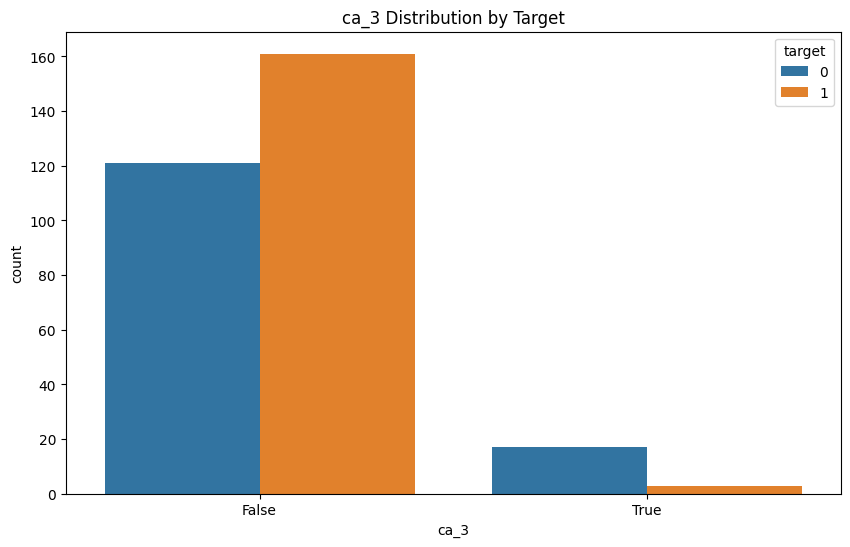

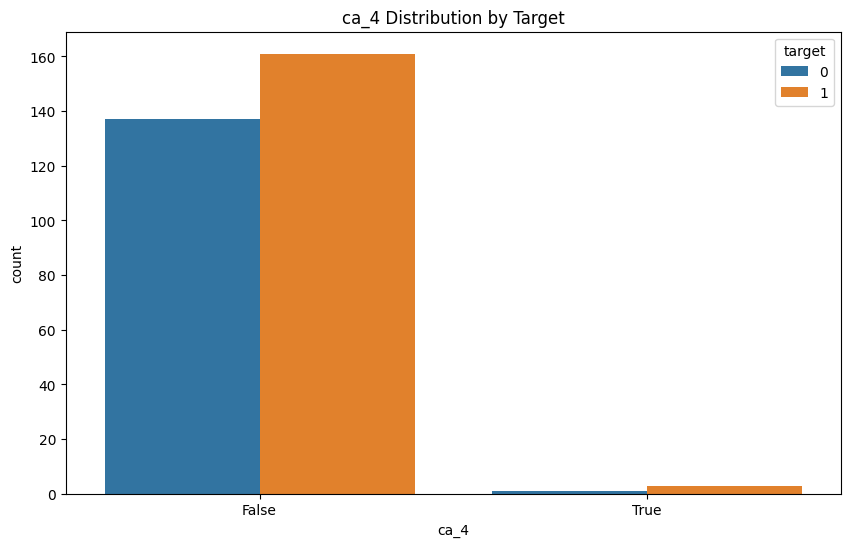

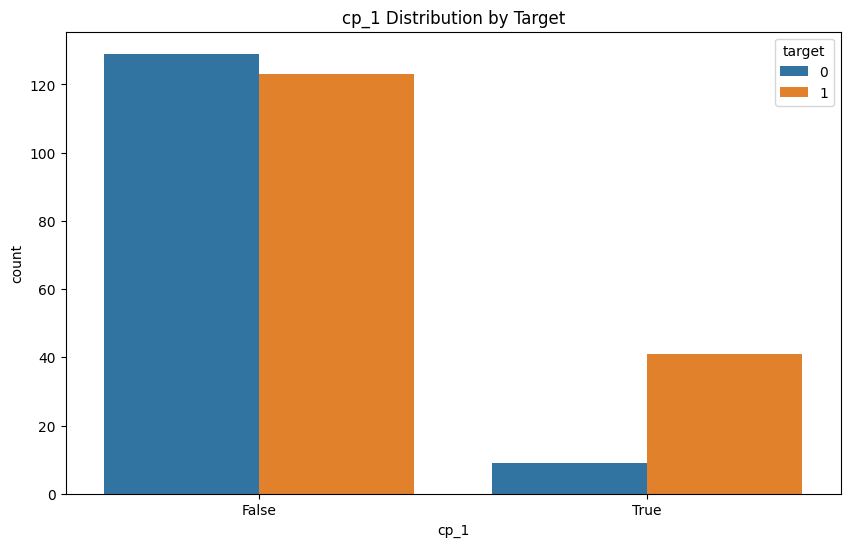

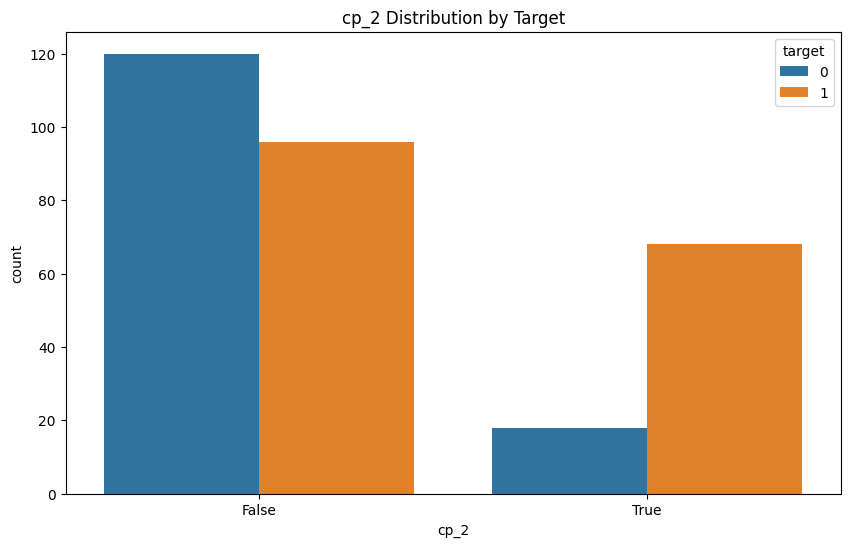

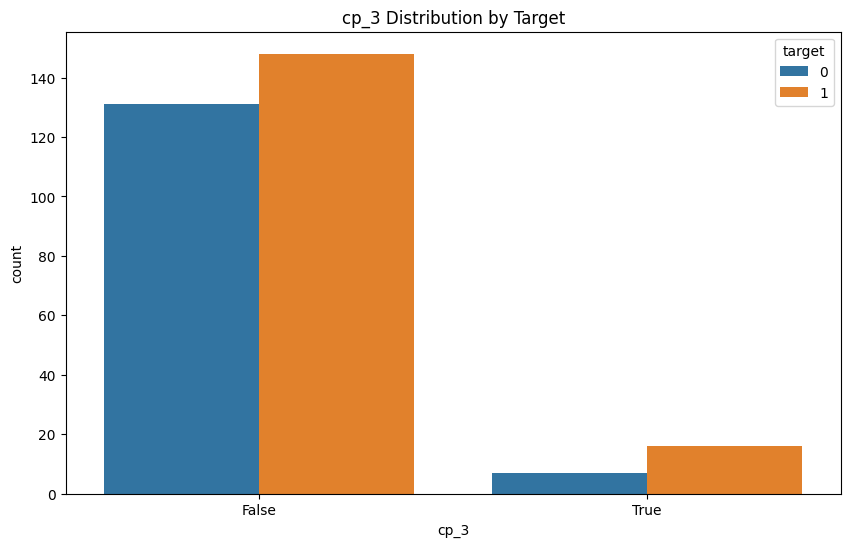

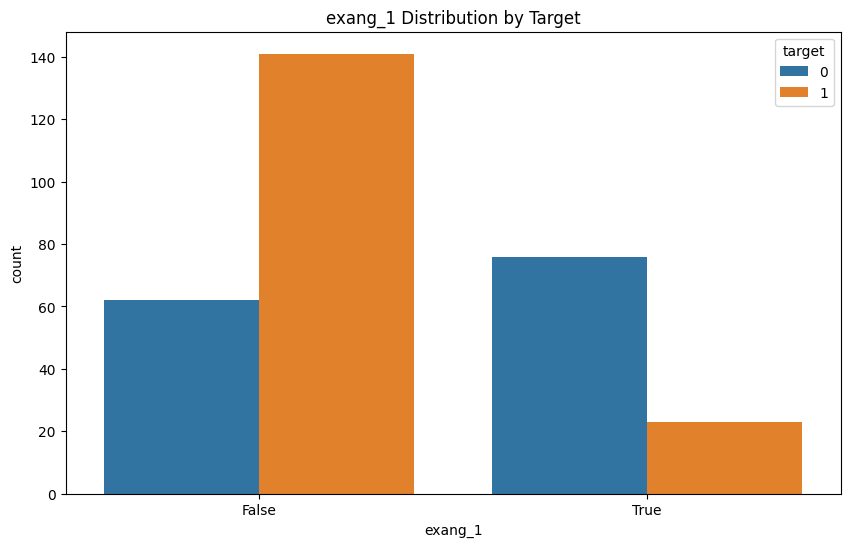

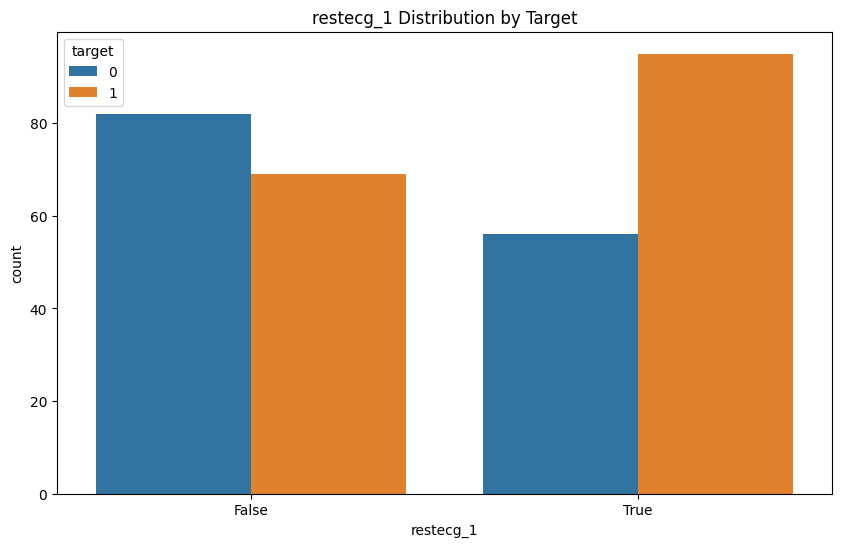

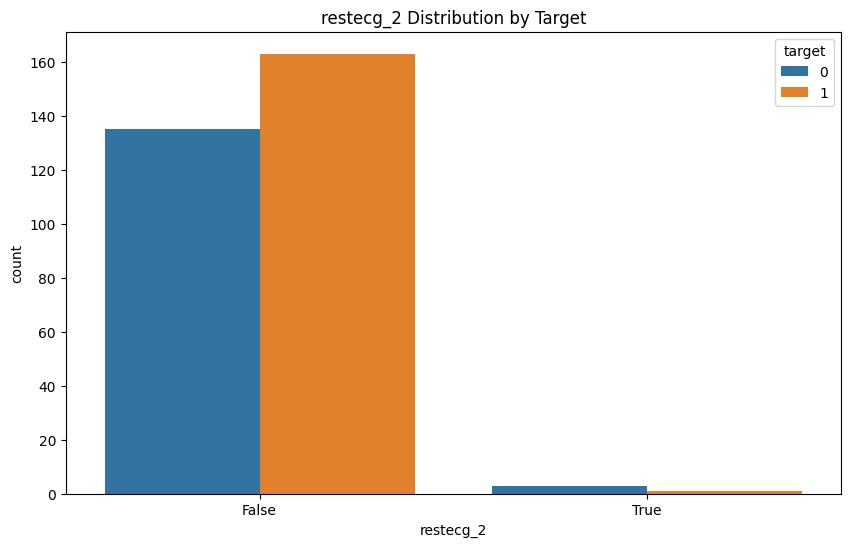

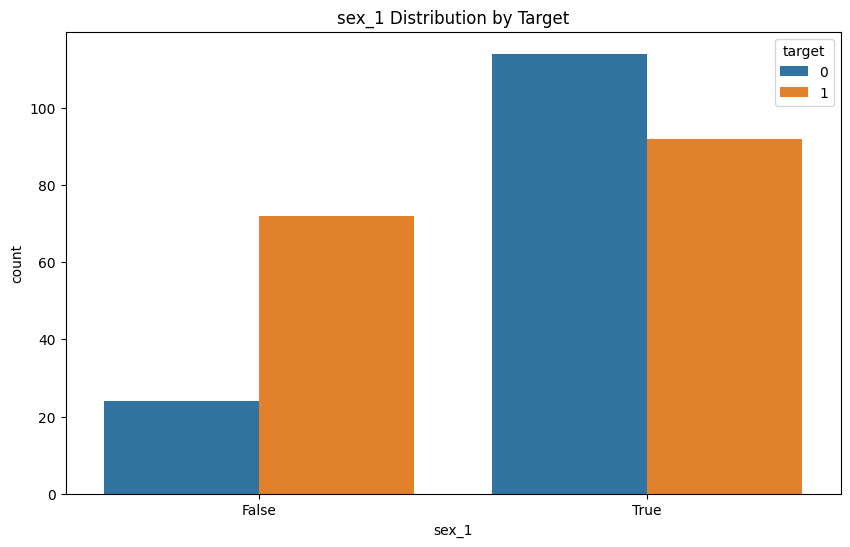

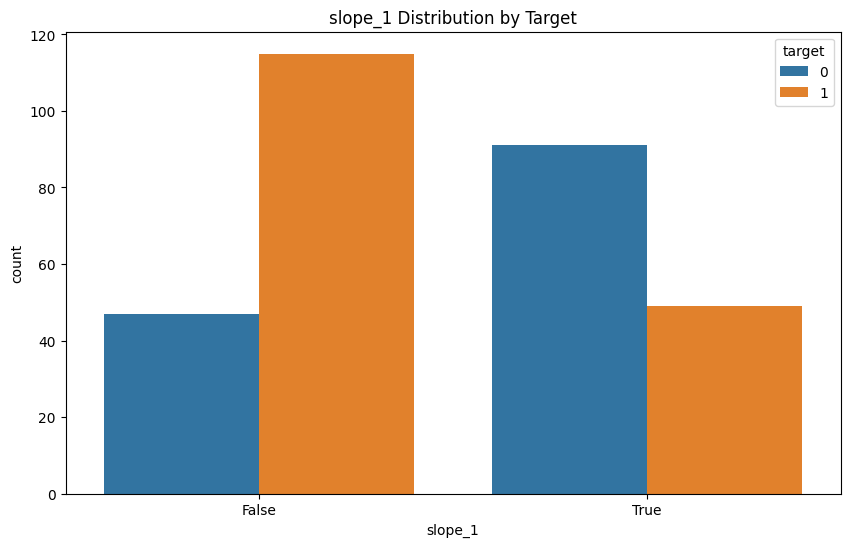

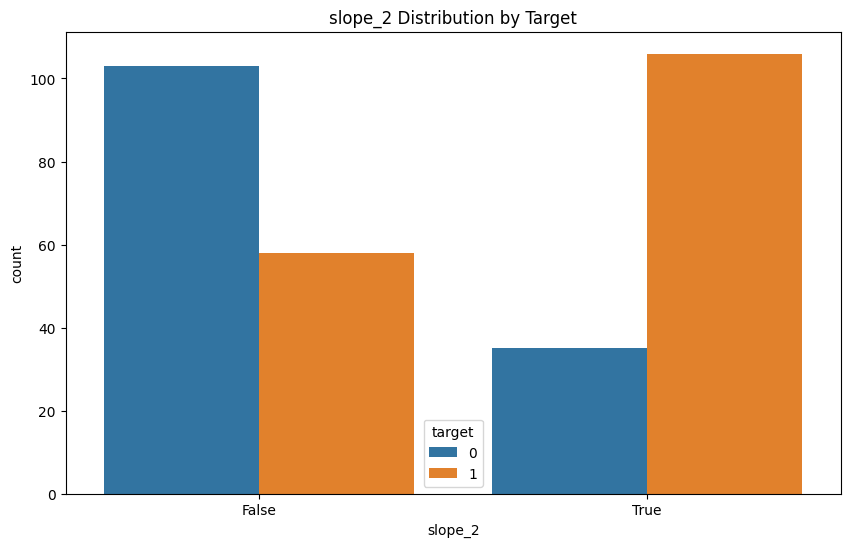

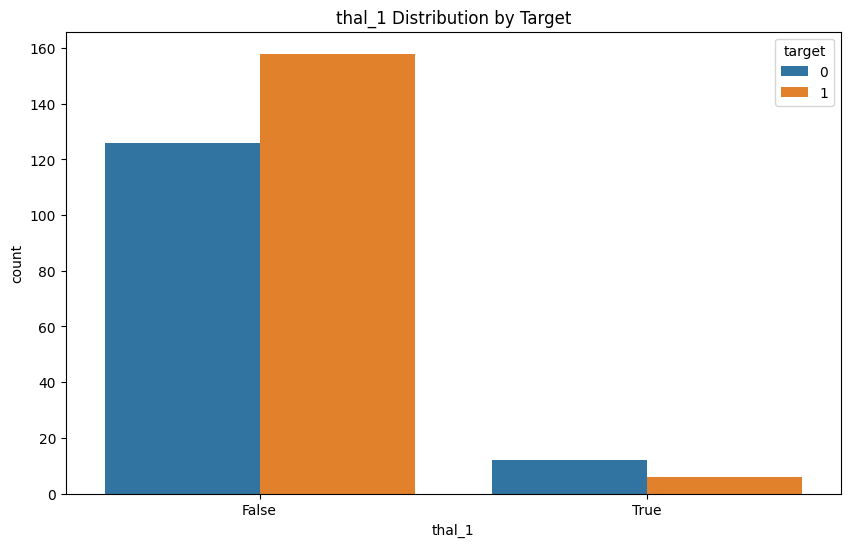

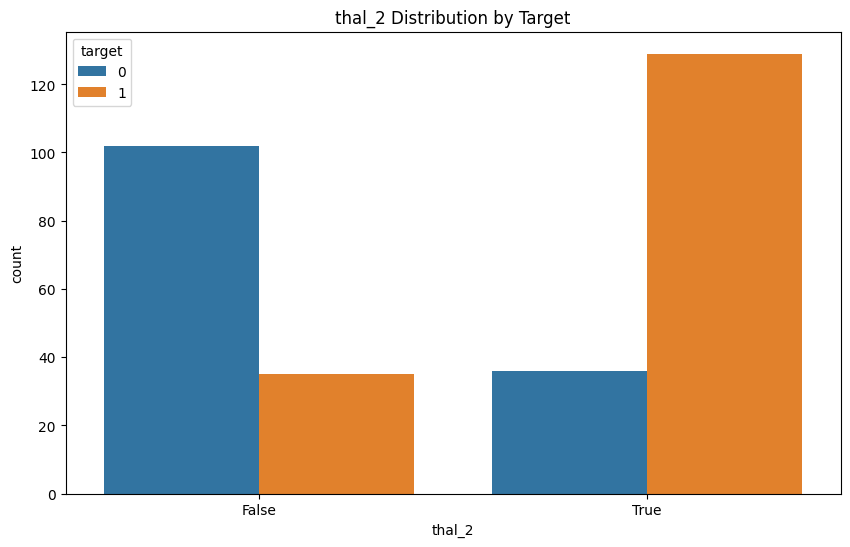

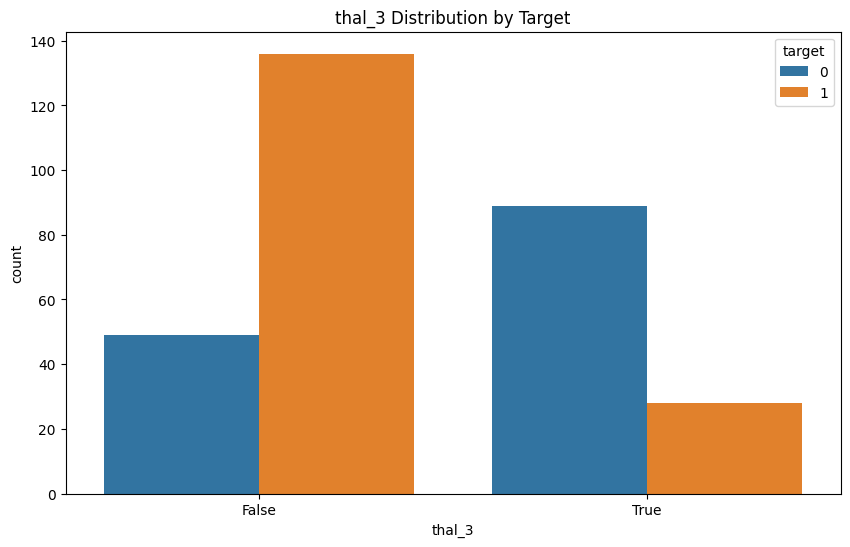

In [28]:
# Countplot of categorical features by target variable
encoded_features = df.columns.difference(numerical_features).difference(['target'])
for feature in encoded_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='target', data=df)
    plt.title(f'{feature} Distribution by Target')
    plt.show()

***Developing a predictive model to estimate the risk of a heart attack***

In [29]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [32]:
# Split the data into features and target variable
X = df.drop('target', axis=1)
y = df['target']

In [33]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Training a Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9016393442622951
Confusion Matrix:
 [[27  2]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [36]:
# Training a Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [37]:
# Training a Support Vector Machine (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8360655737704918
Confusion Matrix:
 [[26  3]
 [ 7 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [38]:
# Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7868852459016393
Confusion Matrix:
 [[26  3]
 [10 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



***Compare Models and Select the Best One***

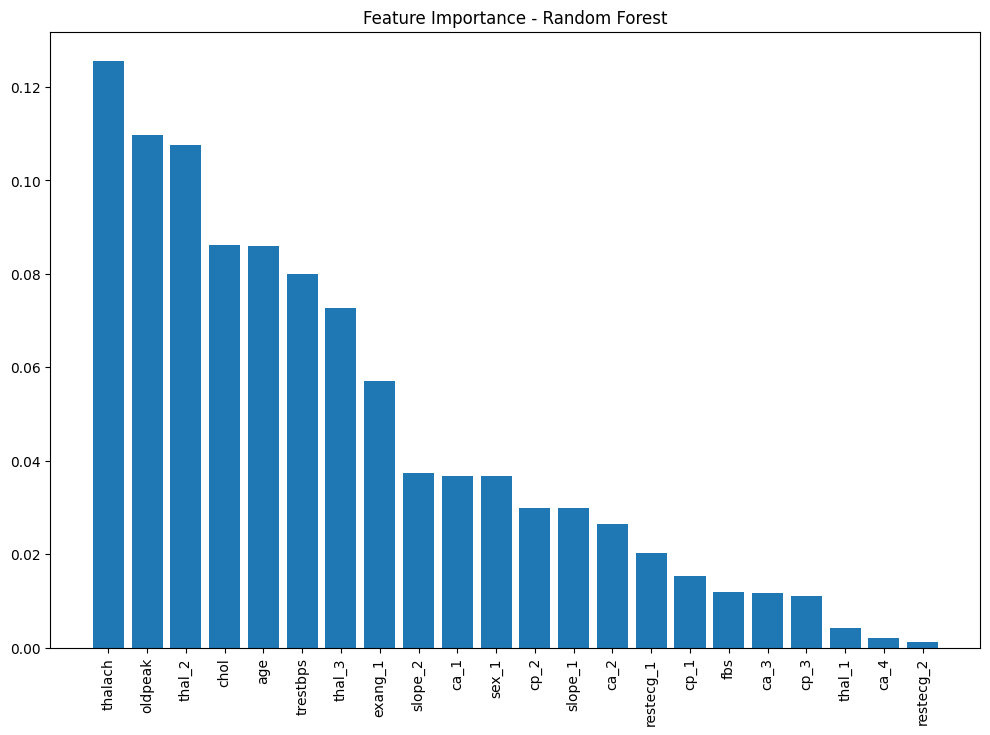

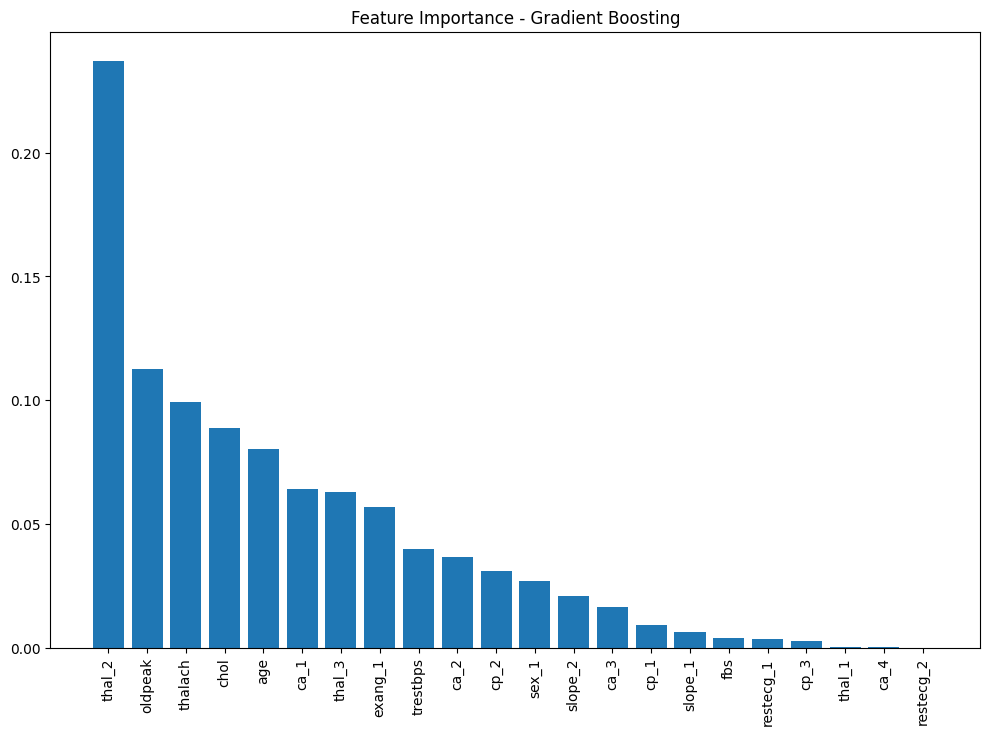

In [39]:
# Feature importance for Random Forest
importances_rf = rf_clf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features_rf = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X.shape[1]), features_rf[indices_rf], rotation=90)
plt.show()

# Feature importance for Gradient Boosting
importances_gb = gb_clf.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]
features_gb = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importance - Gradient Boosting")
plt.bar(range(X.shape[1]), importances_gb[indices_gb], align="center")
plt.xticks(range(X.shape[1]), features_gb[indices_gb], rotation=90)
plt.show()

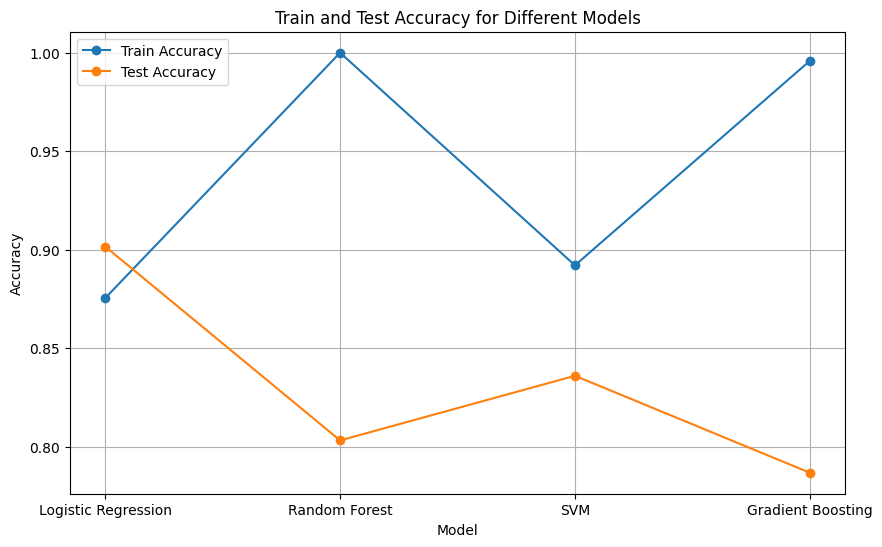

In [40]:
# Calculate training and test accuracy for each model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

accuracy_train = {}
accuracy_test = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train[name] = accuracy_score(y_train, y_train_pred)
    accuracy_test[name] = accuracy_score(y_test, y_test_pred)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_train.keys()), list(accuracy_train.values()), label='Train Accuracy', marker='o')
plt.plot(list(accuracy_test.keys()), list(accuracy_test.values()), label='Test Accuracy', marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Models')
plt.legend()
plt.grid(True)
plt.show()

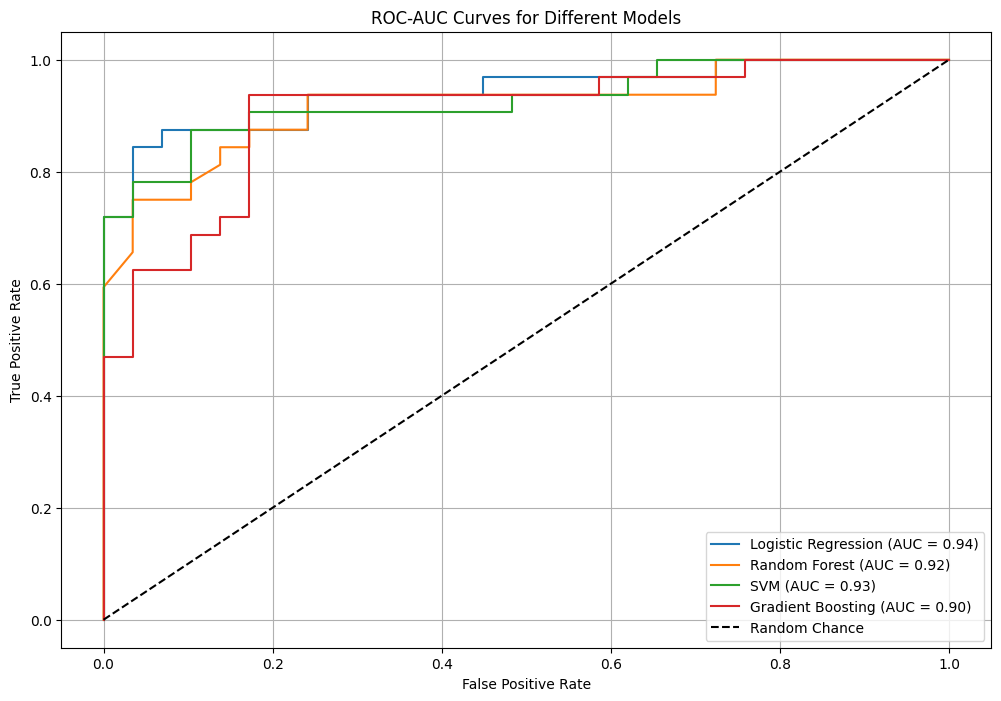

In [41]:
# Plot ROC-AUC Curves
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')

plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()